In [1]:
from keras.datasets import mnist
from keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Input,AveragePooling2D,Reshape,Activation,merge
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.utils import plot_model, to_categorical

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#数据变成TensorFow为Backend的形式
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#把标签变成one-hot编码的形式
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [16]:
# 构建LeNet-5网络
model = Sequential()
model.add(Conv2D(input_shape = (28,28,1), filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history_conv = model.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 59s 991us/step - loss: 0.3808 - acc: 0.8930
Epoch 2/5
60000/60000 [==============================] - 58s 964us/step - loss: 0.0908 - acc: 0.9720
Epoch 3/5
60000/60000 [==============================] - 57s 951us/step - loss: 0.0645 - acc: 0.9806
Epoch 4/5
60000/60000 [==============================] - 57s 949us/step - loss: 0.0509 - acc: 0.9840
Epoch 5/5
60000/60000 [==============================] - 57s 949us/step - loss: 0.0415 - acc: 0.9874


In [29]:
# 构建Inception网络
def inception(x):
    inception_1x1 = Conv2D(4,(1,1), padding='same', activation='relu')(x)
    inception_3x3_reduce = Conv2D(4,(1,1), padding='same', activation='relu')(x)
    inception_3x3 = Conv2D(4,(3,3), padding='same', activation='relu')(inception_3x3_reduce)
    inception_5x5_reduce = Conv2D(4,(1,1), padding='same', activation='relu')(x)
    inception_5x5 = Conv2D(4,(5,5), padding='same', activation='relu')(inception_5x5_reduce)
    inception_pool = MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same')(x)
    inception_pool_proj = Conv2D(4,(1,1), padding='same', activation='relu')(inception_pool)
    inception_output = merge([inception_1x1, inception_3x3, inception_5x5, inception_pool_proj], 
                                mode='concat', concat_axis=3)
    return inception_output
def model(x):
    x = Conv2D(input_shape = (28,28,1), filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = inception(x)
    x = MaxPool2D(pool_size=(2,2), strides=2)(x)
    x = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = inception(x)
    x = MaxPool2D(pool_size=(2,2), strides=2)(x)
    x = Flatten()(x)
    x = Dense(500, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    return output
input_img = Input(shape = (28,28,1))
inception_net = Model(input_img,model(input_img))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [30]:
inception_net.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history_inception = inception_net.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 84s 1ms/step - loss: 0.4486 - acc: 0.8848
Epoch 2/5
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0881 - acc: 0.9725
Epoch 3/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0616 - acc: 0.9809
Epoch 4/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0472 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0391 - acc: 0.9872


In [17]:
# convolution summary
model.summary()
# Inception summary
inception_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 784)               0         
__________

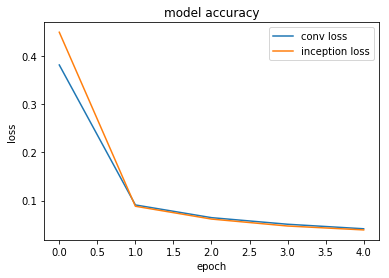

In [31]:
# summarize history for accuracy
plt.plot(history_conv.history['loss'])
plt.plot(history_inception.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['conv loss','inception loss'], loc='upper right')
plt.show()

In [ ]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(inception_net, to_file="inception_net.png", show_shapes=True)
Image('inception_net.png')